In [30]:
import random

V0 = 50.0 
H0 = 100.0
G = 9.81 

TARGET_MIN = 50
TARGET_MAX = 340
HIT_THRESHOLD = 5

random_target_coordinate = random.randint(TARGET_MIN, TARGET_MAX)
print(f"Wybrany cel znajduje się w odległości: {random_target_coordinate} m")

Wybrany cel znajduje się w odległości: 328 m


In [31]:
import math

def projectile_distance(v0: float, alpha_deg: float, h: float, g: float = 9.81) -> float:
    """
    Zwraca poziomą odległość (distance) lotu:
    distance = (v0*sin(alpha) + sqrt((v0*sin(alpha))^2 + 2*g*h)) * v0*cos(alpha) / g
    Kąt alpha w stopniach.
    """
    alpha = math.radians(alpha_deg)
    vertical = v0 * math.sin(alpha)
    t = (vertical + math.sqrt(vertical**2 + 2 * g * h)) / g
    return v0 * math.cos(alpha) * t

def distance_for_angle(angle_deg: float) -> float:
    return projectile_distance(V0, angle_deg, H0, G)


def is_target_hitted(distance: int):
    if abs(random_target_coordinate - distance)<=5:
        return True
    else:
        return False

In [32]:
numberOfGuess = 0
print(f"Some hacky value {random_target_coordinate} :P")
while True:
    angle =  int(input("Podaj kat"))
    user_distance = distance_for_angle(angle)
    if is_target_hitted(user_distance):
        print(f"Gratulacje obiekt trafiony za {numberOfGuess} razem")
        break
    else:
        if user_distance>random_target_coordinate:
            print(f"Odleglosc {user_distance} to za duzo zmniejsz kat")
        else:
            print(f"Odleglosc {user_distance} to za malo zwieksz kat")
        numberOfGuess+=1




    


Some hacky value 328 :P
Odleglosc 318.78976015316556 to za malo zwieksz kat
Gratulacje obiekt trafiony za 1 razem


Kat: 25


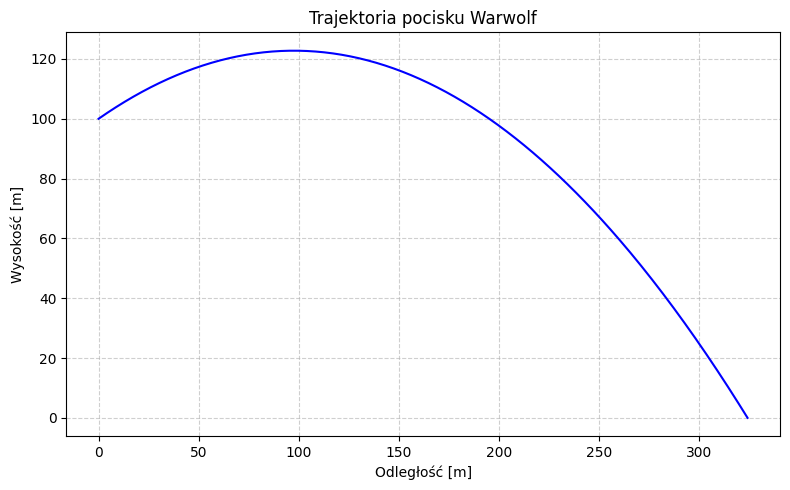

In [33]:

import numpy as np
import matplotlib.pyplot as plt

try:
    print(f"Kat: {angle}")
    _angle_deg = float(angle)
except NameError:
    _angle_deg = 45.0 

alpha = np.deg2rad(_angle_deg)
vx0 = V0 * np.cos(alpha)
vy0 = V0 * np.sin(alpha)

discriminant = vy0**2 + 2 * G * H0
T = (vy0 + np.sqrt(discriminant)) / G

N = 300
t = np.linspace(0, T, N)
x = vx0 * t
y = H0 + vy0 * t - 0.5 * G * t**2

plt.figure(figsize=(8, 5))
plt.plot(x, y, color='blue')
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.xlabel('Odległość [m]')
plt.ylabel('Wysokość [m]')
plt.title('Trajektoria pocisku Warwolf')
plt.tight_layout()

plt.savefig('trajektoria.png', dpi=150)
plt.show()
